In [19]:
# import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

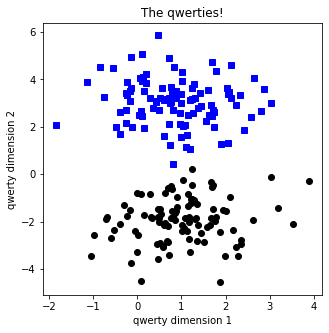

In [20]:
# Parameters
n_per_clust = 100
blur = 1
A = [1, 3]
B = [1, -2]

# Generate data
a = [A[0] + np.random.randn(n_per_clust) * blur, A[1] + np.random.randn(n_per_clust) * blur]
b = [B[0] + np.random.randn(n_per_clust) * blur, B[1] + np.random.randn(n_per_clust) * blur]
# Concatanate into a matrix
data_np = np.hstack(tup=(a, b)).T

# True labels
labels_np = np.vstack(tup=(np.zeros(shape=(n_per_clust, 1)), np.ones(shape=(n_per_clust, 1))))

# Convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# Show the data
fig = plt.figure(figsize=(5, 5))
plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels == 0)[0], 1], 'bs')
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels == 1)[0], 1], 'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

# Functions to build and train the model

In [21]:
def create_ANN_model(learning_rate):
  # Model architecture
  ANN_classify = nn.Sequential(
    nn.Linear(in_features=2, out_features=16),  # Input layer
    # nn.ReLU(),                                  # Activation unit
    nn.Linear(in_features=16, out_features=1),  # Hidden layer
    # nn.ReLU(),                                  # Activation unit
    nn.Linear(in_features=1, out_features=1),   # Output unit
    nn.Sigmoid(),                               # Final activation unit
  )
  # Loss function
  loss_func = nn.BCELoss()
  # Optimizer
  optimizer = torch.optim.SGD(params=ANN_classify.parameters(), lr=learning_rate)
  # Model output
  return ANN_classify, loss_func, optimizer

# A function that trains the model

In [22]:
# A fixed parameter
num_epochs = 1000

def train_the_model(ANN_model, loss_func):
  # Initialize losses
  losses = torch.zeros(num_epochs)
  # Loop over epochs
  for epoch_i in range(num_epochs):

    # Forward pass
    y_hat = ANN_model(data)

    # Compute loss
    loss = loss_func(y_hat, labels)
    losses[epoch_i] = loss

    # Backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  # Final forward pass
  predictions = ANN_model(data)

  # Compute the predictions and report accuracy
  # Note: wasn't this ">0" previously?!?!
  total_acc = 100 * torch.mean(((predictions > 0.5) == labels).float())

  return losses, predictions, total_acc

# Test the new code by running it once

Final Accuracy: 99.5


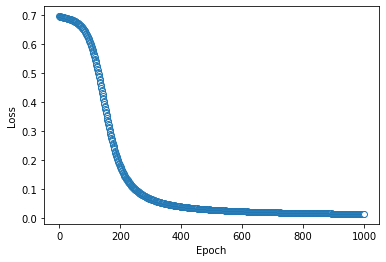

In [23]:
# Create everything
ANN_classify, loss_func, optimizer = create_ANN_model(learning_rate=0.01)

# Run it
losses, predictions, total_acc = train_the_model(ANN_model=ANN_classify, loss_func=loss_func)

# Report accuracy
print(f'Final Accuracy: {total_acc}')

# Show the losses
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Now for the real test (varying learning rates)

In [24]:
# Learning rates
learning_rates = np.linspace(start=0.001, stop=0.1, num=50)

# Initialize
acc_by_LR = []
all_losses = np.zeros(shape=(len(learning_rates), num_epochs))

# The loop
for i, learning_rate_i in enumerate(learning_rates):
    # Create and run the model
    ANN_classify, loss_func, optimizer = create_ANN_model(learning_rate=learning_rate_i)
    losses, predictions, total_acc = train_the_model(ANN_model=ANN_classify, loss_func=loss_func)

    # Store the results
    acc_by_LR.append(total_acc)
    all_losses[i, :] = losses.detach()

# Plot the results

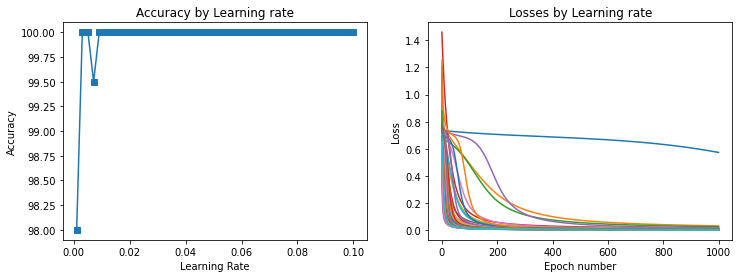

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax[0].plot(learning_rates, acc_by_LR, 's-')
ax[0].set_xlabel('Learning Rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by Learning rate')

ax[1].plot(all_losses.T)
ax[1].set_title('Losses by Learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')

plt.show()

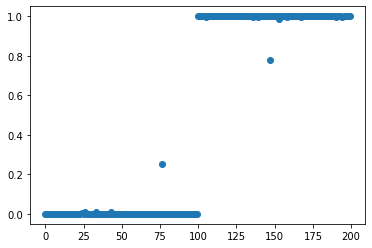

In [26]:
plt.plot(predictions.detach(), 'o')

In [27]:
# Proportion of runs where the model had at least 70% accuracy
print(sum(torch.tensor(acc_by_LR) > 70) / len(acc_by_LR))

tensor(1.)


In [28]:
print(acc_by_LR)

[tensor(98.), tensor(100.), tensor(100.), tensor(99.5000), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.), tensor(100.)]


# Additional explorations
1) The code creates a model with 16 hidden units. Notice where the two "16"s appear when constructing the model. 
   Recreate the model using 32 hidden units. Does that help with the issue of models getting stuck in local minima?

2) Adjust the code to create two hidden layers. The first hidden layer should have 16 hidden units and the second 
   hidden layer shuold have 32 units. What needs to change in the code to make the numbers match to prevent coding errors?